# Make Nice Plots Used Reduced Outputs

- Run using python 3.9
- If a package is not installed do `!{sys.executable} -m pip install <module>`

In [1]:
import sys, os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
import scipy
import pickle 
import uproot
print(uproot.__version__)

5.1.2


In [2]:
## -------------------------------- ##
##        SET PLOTTING STYLE        ##
## -------------------------------- ##
matplotlib.rcParams['figure.figsize'] = 8.5,6
matplotlib.rcParams['figure.subplot.left'] = 0.15
matplotlib.rcParams['figure.subplot.right'] = 0.88
matplotlib.rcParams['figure.subplot.bottom'] = 0.15
matplotlib.rcParams['figure.subplot.top'] = 0.88
matplotlib.rcParams['axes.titlesize'] = 20
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['axes.labelweight'] = 'normal'
matplotlib.rcParams['font.weight'] = 'normal' 
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['lines.markersize'] = 10
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['xtick.major.size'] = 8
matplotlib.rcParams['ytick.major.size'] = 8
matplotlib.rcParams['xtick.minor.size'] = 4
matplotlib.rcParams['ytick.minor.size'] = 4
matplotlib.rcParams['xtick.minor.visible'] = True 
matplotlib.rcParams['ytick.minor.visible'] = True
matplotlib.rcParams['xtick.direction'] = 'in' 
matplotlib.rcParams['ytick.direction'] = 'in' 
matplotlib.rcParams['xtick.top'] = True 
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams['xtick.major.pad'] = 6
matplotlib.rcParams['image.cmap'] = 'viridis'

In [3]:
## ----------------------------------------- ##
##       READ IN DICTS TO MAKE PLOTS         ##
## ----------------------------------------- ##

with open('../Data/Cr51_decay_Exits_1cmMaxStep_1umNanosphere_SpherePos_data.pkl', 'rb') as inFile:
#with open('../Data/Cr51_decay_Exits_1cmMaxStep_1umNanosphere_data.pkl', 'rb') as inFile:
#with open('../Data/Cr51_decay_Exits_1cmMaxStep_100nmNanosphere_data.pkl', 'rb') as inFile:
    dictList = pickle.load(inFile)

inFile.close()

nEvents = len(dictList['primaryParticleEnergy'])
print(nEvents, 'events in file')

100000 events in file


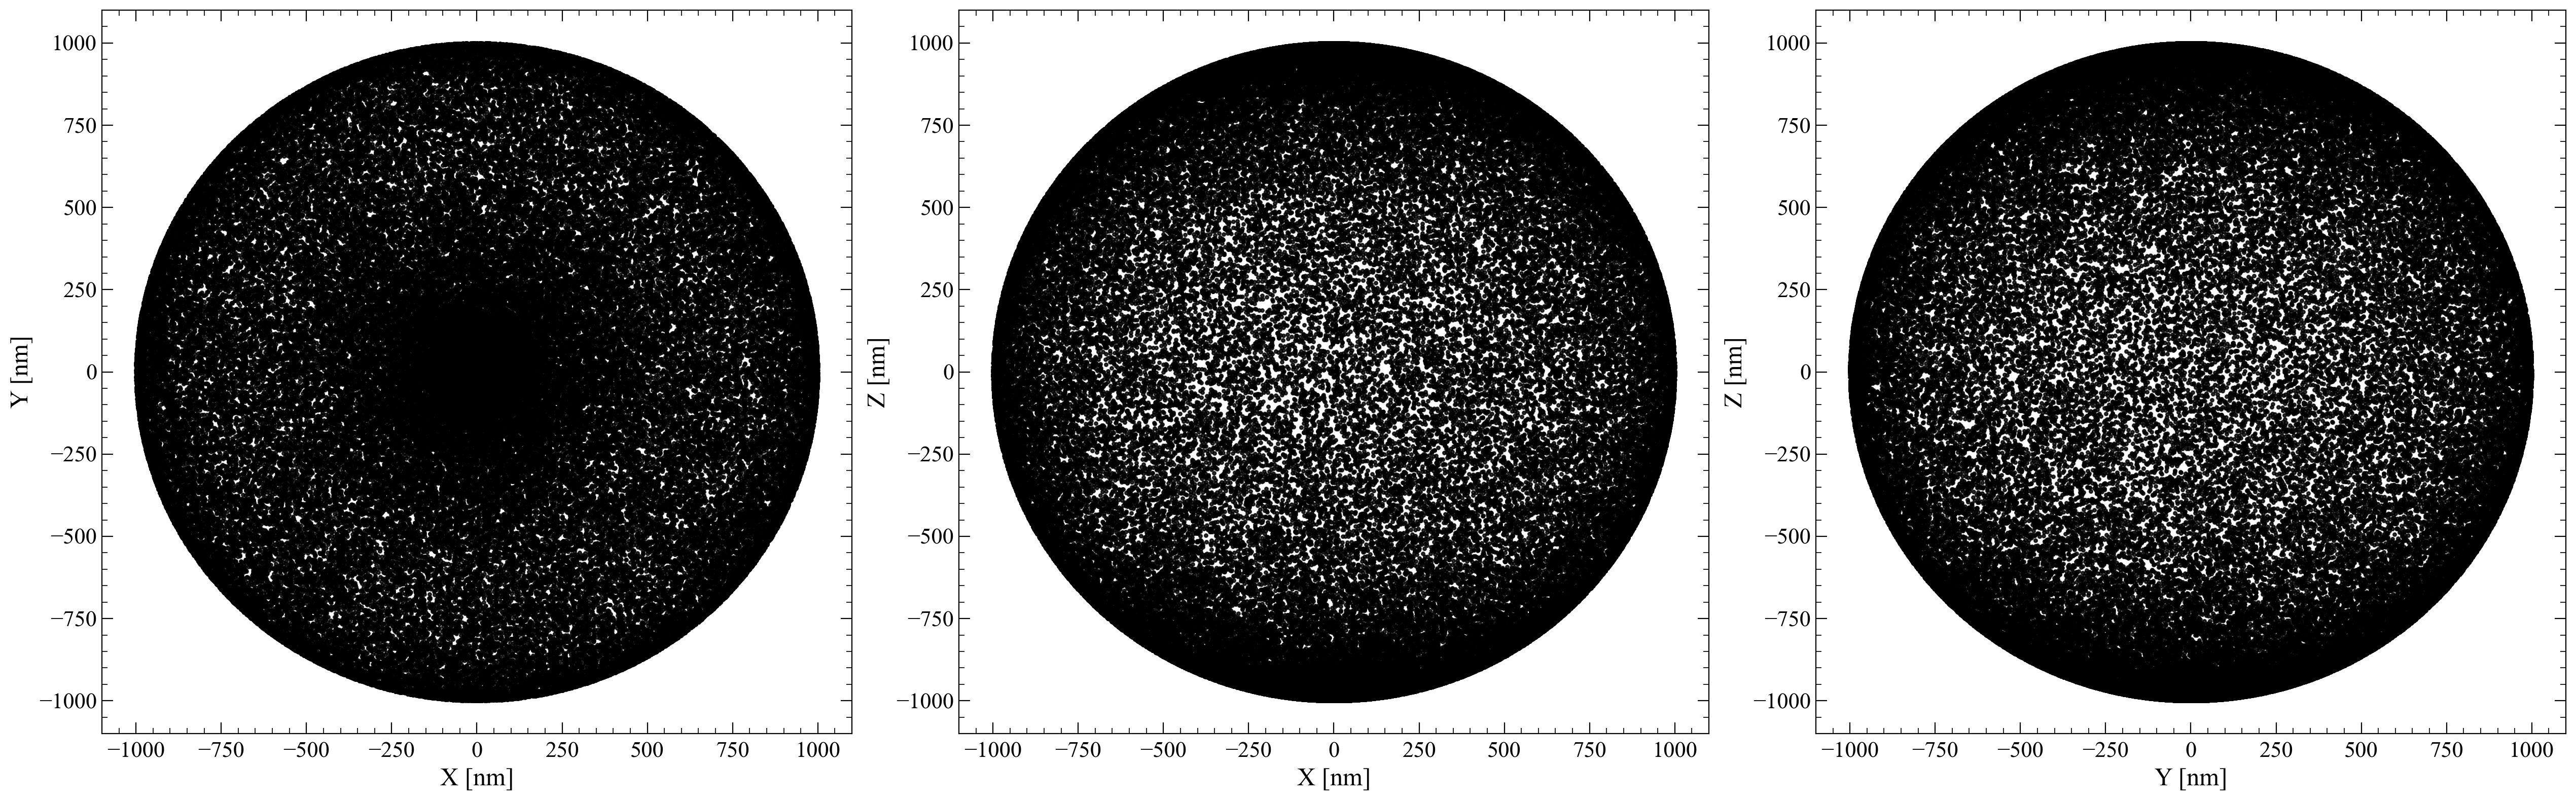

In [7]:
## ---------------------------------- ##
##        PLOT PRIMARY POSITION       ##
## ---------------------------------- ##

fig, ax = plt.subplots(1,3, figsize = (25.5,8), dpi=200)

ax[0].scatter(dictList['primaryX_mm']*1e6, dictList['primaryY_mm']*1e6, color='black', s=5, alpha=0.8)
ax[1].scatter(dictList['primaryX_mm']*1e6, dictList['primaryZ_mm']*1e6, color='black', s=5, alpha=0.8)
ax[2].scatter(dictList['primaryY_mm']*1e6, dictList['primaryZ_mm']*1e6, color='black', s=5, alpha=0.8)

ax[0].set_xlabel('X [nm]')
ax[0].set_ylabel('Y [nm]')

ax[1].set_xlabel('X [nm]')
ax[1].set_ylabel('Z [nm]')

ax[2].set_xlabel('Y [nm]')
ax[2].set_ylabel('Z [nm]')

fig.tight_layout()

On Event 0 / 100000
On Event 10000 / 100000
On Event 20000 / 100000
On Event 30000 / 100000
On Event 40000 / 100000
On Event 50000 / 100000
On Event 60000 / 100000
On Event 70000 / 100000
On Event 80000 / 100000
On Event 90000 / 100000
[11.003868795345404, 4.107636936684459, 27.065334169440522, 46.63473215523868, 59.290012538874194, 7.081576319111994, 9.5339855436732, 9.148707513146725, 36.07861049997391, 14.234559405097395, 11.035586312275923, 24.514033499147075, 78.96672604392586, 19.786939810210537, 76.20345895008656, 6.774772988744046, 67.3535749672095, 81.44258124534637, 50.55992252164529, 7.849445553100177, 43.376170563651804, 58.838372098171924, 14.917311799048116, 54.59210366340565, 30.887518457512176, 18.4318523794066, 16.91420927190831, 21.635253529050136, 17.071559290149516, 27.160169451805682, 63.55297986781601, 33.7705717956425, 84.97198528856663, 61.25617816426238, 21.587979323689748, 18.18749025259912, 20.636927310644282, 12.582627219143742, 68.81856471059801, 10.1538454

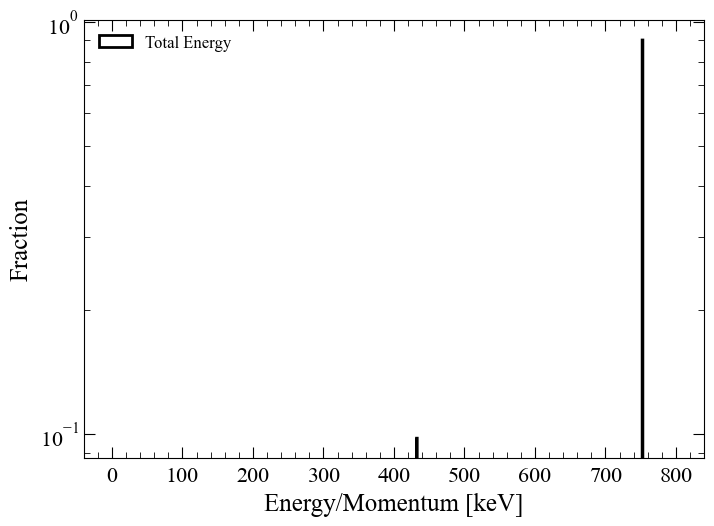

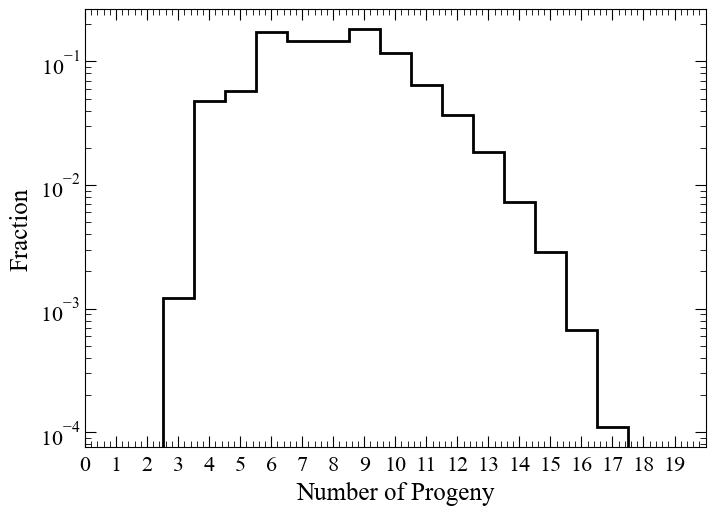

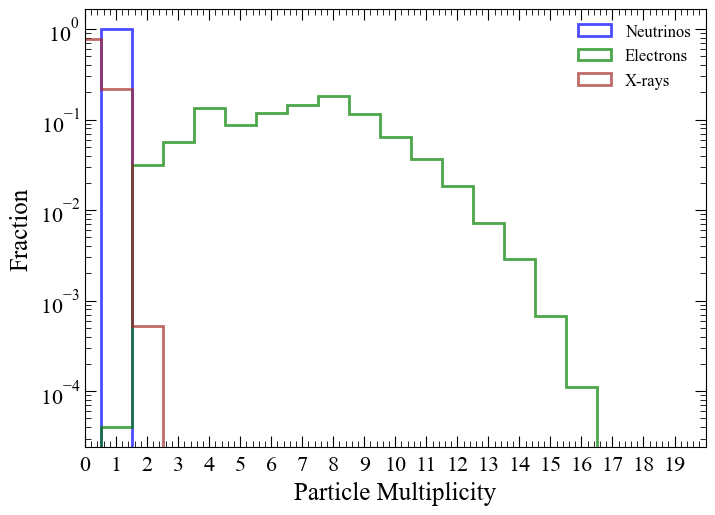

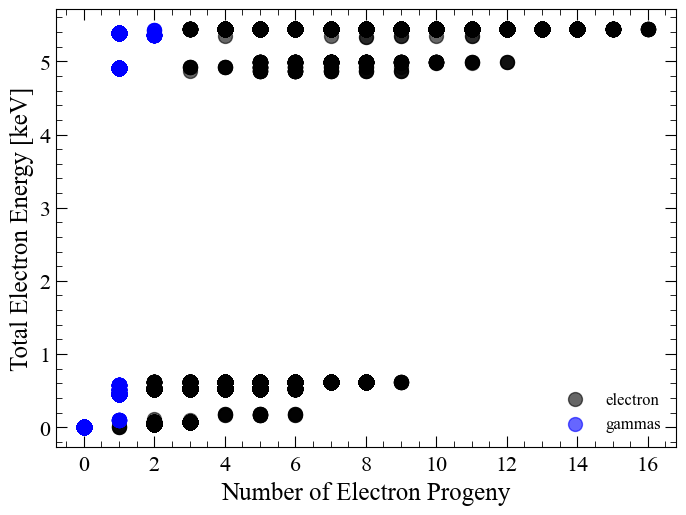

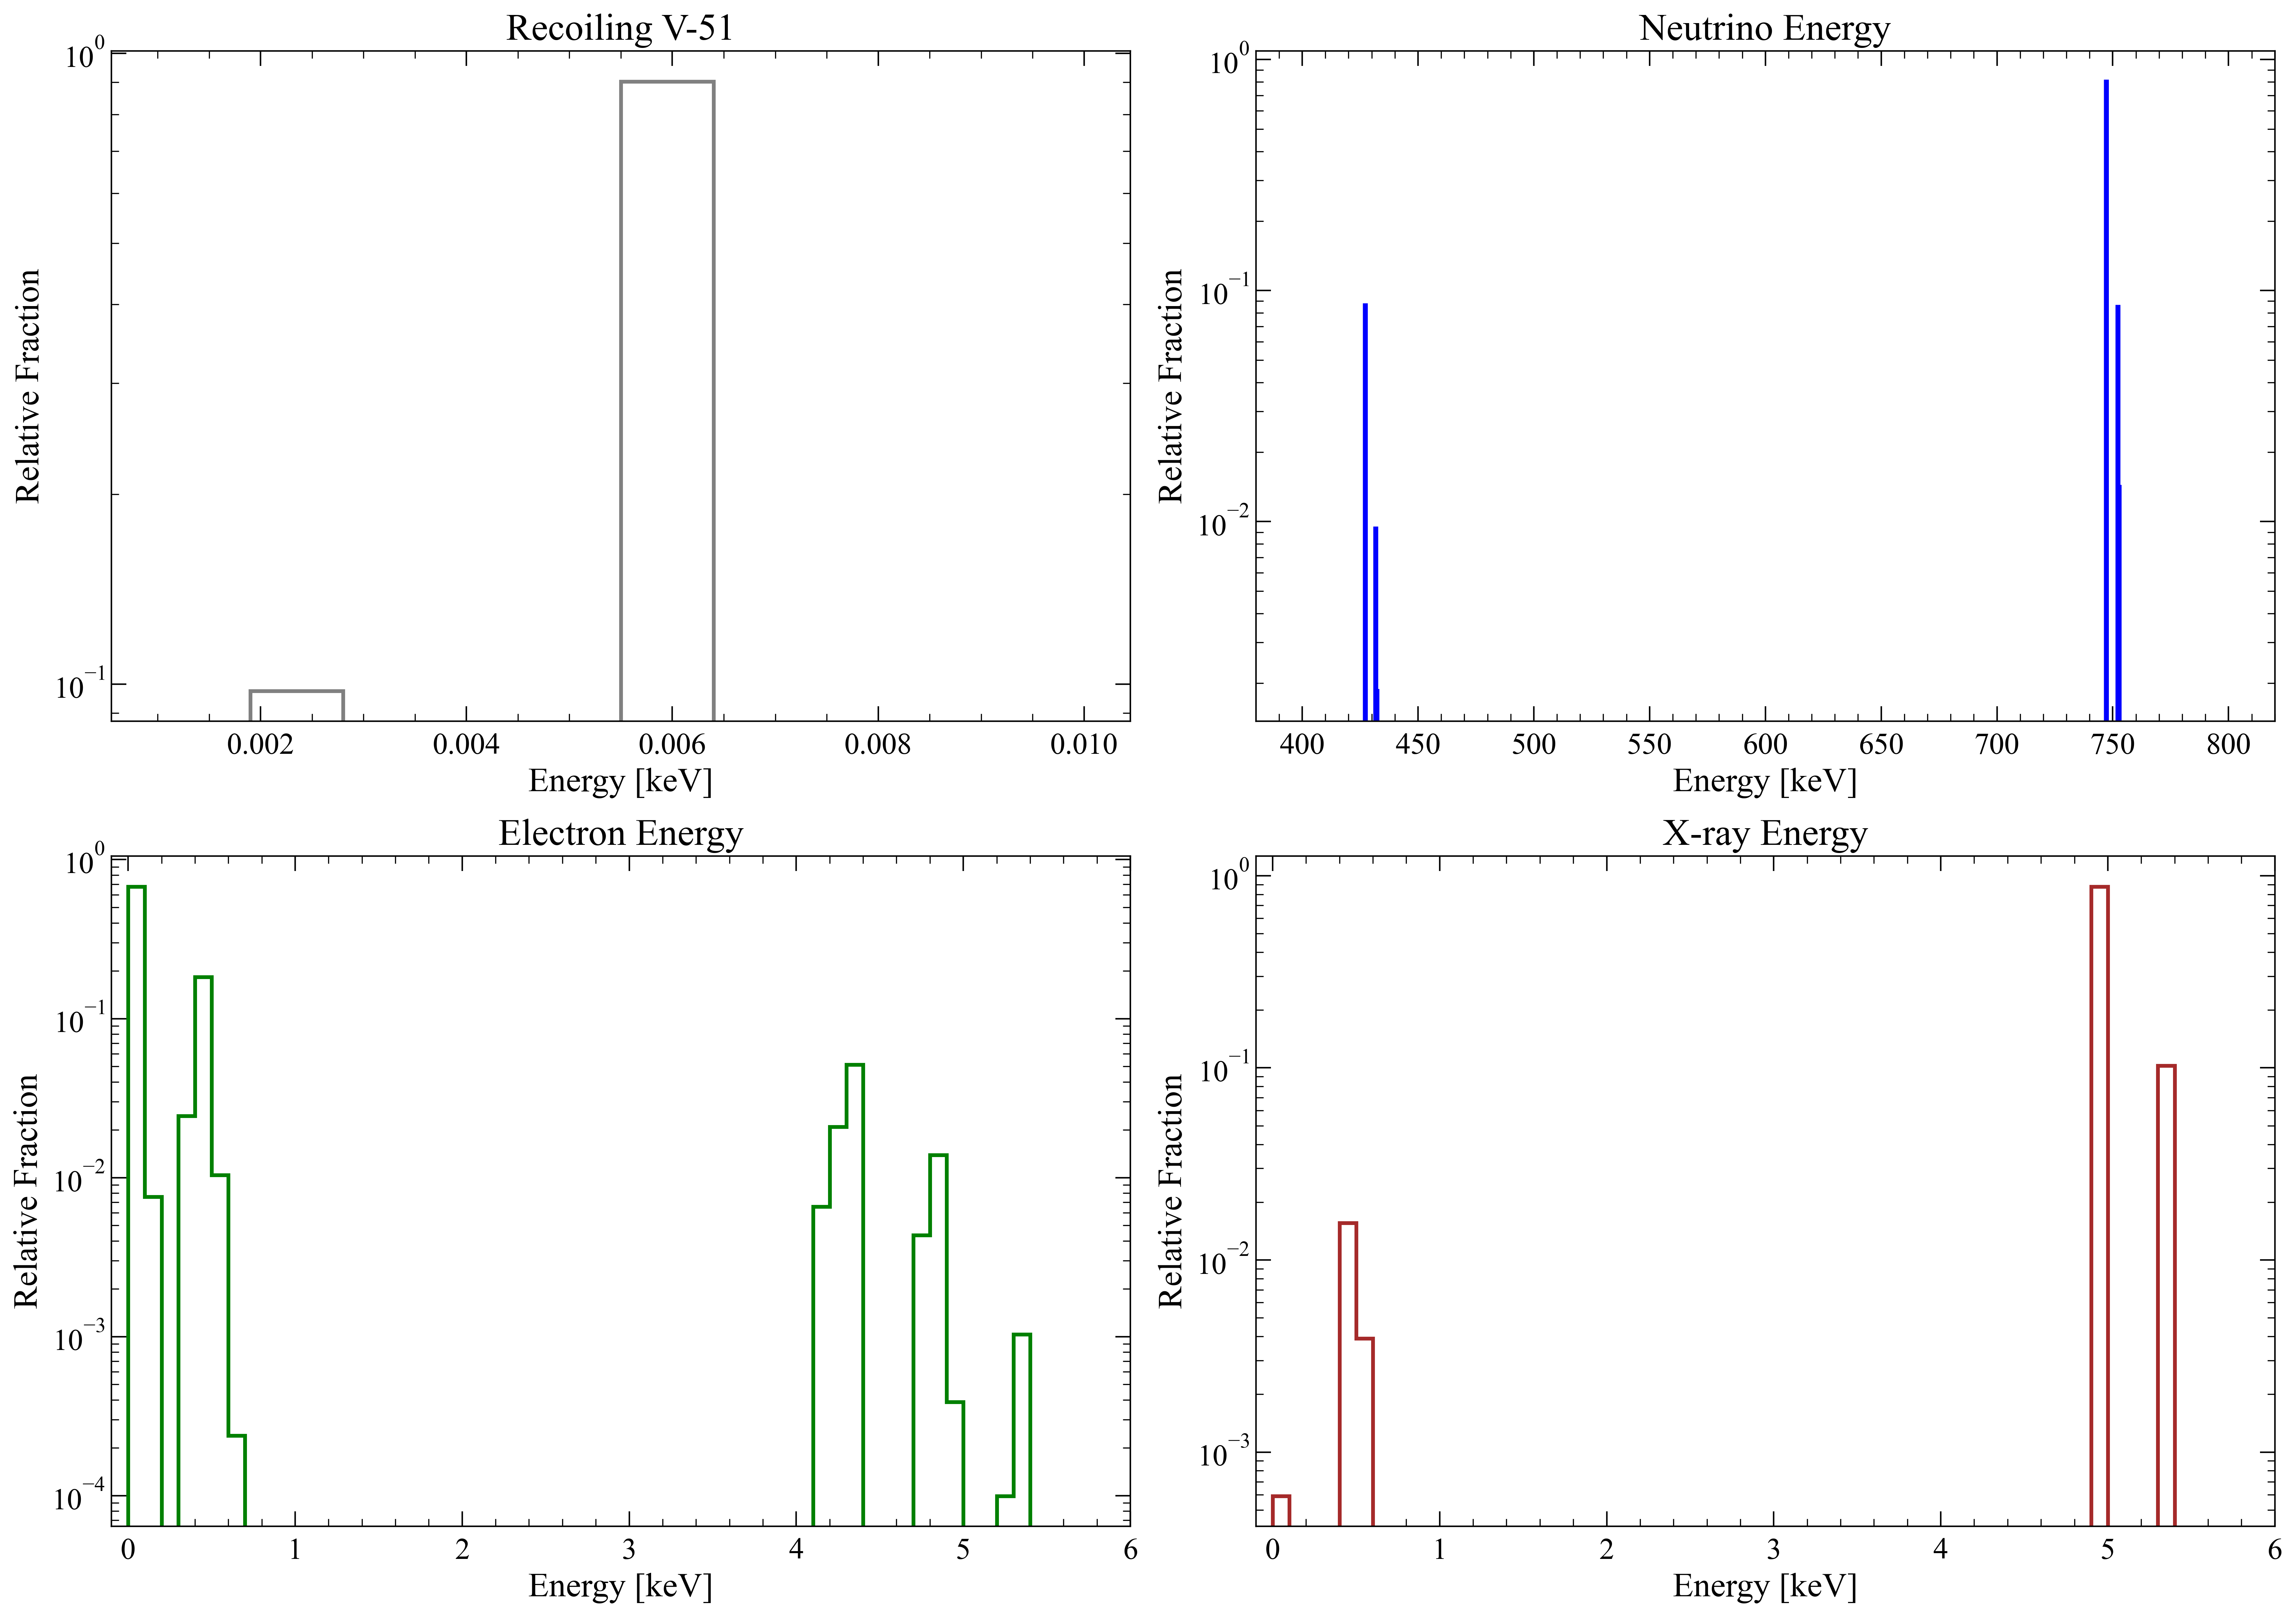

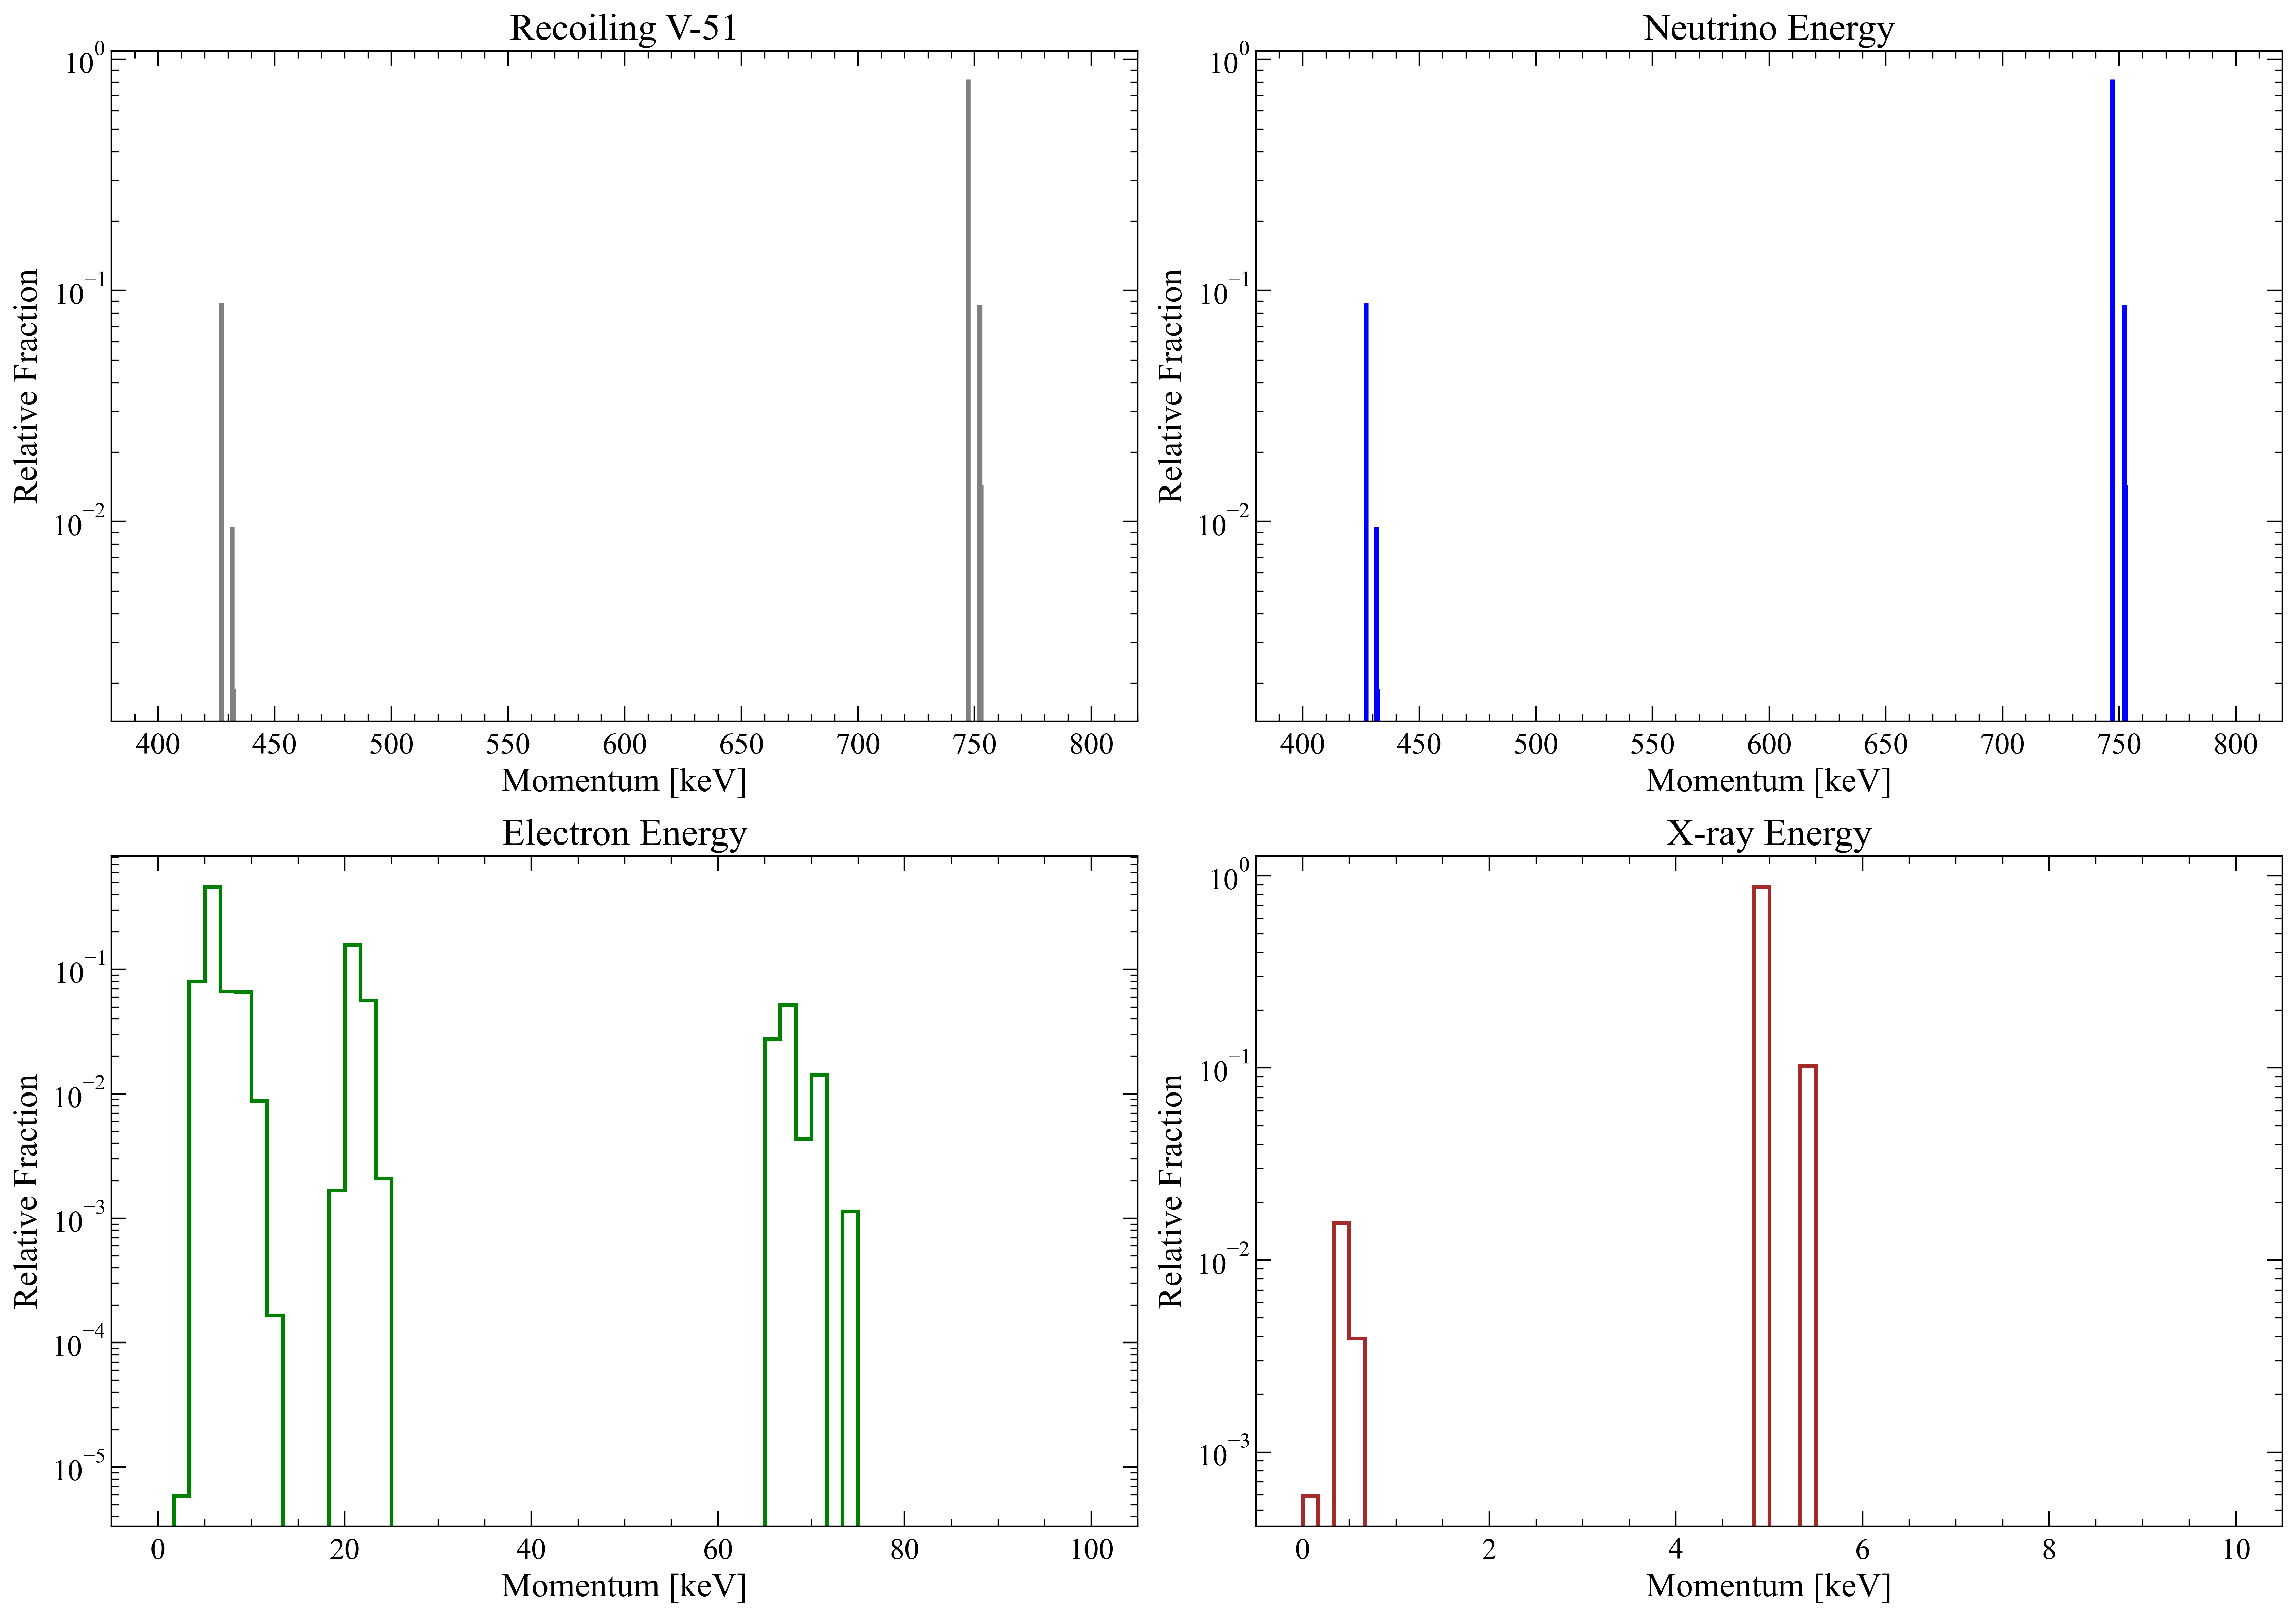

In [4]:
## ------------------------------------ ##
##  INSPECT PRIMARIES Produce in DECAY  ##
## ------------------------------------ ##

## Store info
numberOfProgeny, numberOfNu, numberOfElectron, numberOfGamma = [], [], [], []
IonEnergy, NuEnergy, ElecronEnergy, GammaEnergy = [], [], [], []
IonMomentum, NuMomentum, ElectronMomentum, GammaMomentum  = [], [], [], []
totalDecayEnergy, totalDecayMomentum = [], []
totalDecayMomentum
totalElectronEnergy, totalGammaEnergy = [], []

## loop through all events
for idx, decayProgeny in enumerate(dictList['DecayProgeny']):

    if idx % 10000 == 0:
        print('On Event', idx, '/', nEvents)

    nProgeny = len(decayProgeny)
    
    ## loop through all progeny in an event
    total_energy = 0.
    total_momentum = 0.
    totPartMomX, totPartMomY, totPartMomZ = 0., 0., 0.
    total_gammaEnergy = 0.
    total_electronEnergy = 0.
    nNu = 0 
    nElectron = 0
    nGamma = 0
    
    for trackID, [particleName, particleEnergy, [partMomX, partMomY, partMomZ]] in decayProgeny.items():
        
        total_energy += particleEnergy
        totPartMomX += partMomX
        totPartMomY += partMomY
        totPartMomZ += partMomZ
        totPartMom = np.sqrt( (partMomX)**2 + (partMomY)**2 + (partMomZ)**2 )
        if particleName == 'nu_e':
            nNu += 1
            NuEnergy.append(particleEnergy)
            NuMomentum.append(totPartMom)
        elif particleName == 'e-':
            nElectron += 1
            total_electronEnergy += particleEnergy
            ElecronEnergy.append(particleEnergy)
            ElectronMomentum.append(totPartMom)
        elif particleName == 'gamma':
            nGamma += 1
            total_gammaEnergy += particleEnergy
            GammaEnergy.append(particleEnergy)
            GammaMomentum.append(totPartMom)
        else:
            IonEnergy.append(particleEnergy)
            IonMomentum.append(totPartMom)
        
    ## end progeny loop, store info
    total_momentum = np.sqrt( totPartMomX**2 + partMomY**2 + partMomZ**2 )
    totalDecayEnergy.append(total_energy)
    totalDecayMomentum.append(total_momentum)
    numberOfProgeny.append(nNu+nElectron+nGamma)
    numberOfNu.append(nNu)
    numberOfElectron.append(nElectron)
    numberOfGamma.append(nGamma)
    totalElectronEnergy.append(total_electronEnergy)
    totalGammaEnergy.append(total_gammaEnergy)

## plot total energy
fig, ax = plt.subplots(1,1, dpi=100)

ax.hist(totalDecayEnergy, bins=800, range=[0,800], histtype='step', 
        color='black', lw=2, weights = [1/float(nEvents) for i in range(nEvents)], label='Total Energy')

print(totalDecayMomentum[:100])

#ax.hist(totalDecayMomentum, bins=1000, range=[0,2000], histtype='step', 
#        color='blue', lw=2, weights = [1/float(nEvents) for i in range(nEvents)], label='Total Momentum')

ax.set_yscale('log')
ax.set_ylabel('Fraction')
ax.set_xlabel('Energy/Momentum [keV]')
ax.legend(frameon=False, loc='best', fontsize=12)

## plot progeny multiplicity
fig, ax = plt.subplots(1,1, dpi=100)

ax.hist(numberOfProgeny, bins=40, range=[0,40], histtype='step', align='left', 
        color='black', lw=2, weights = [1/float(nEvents) for i in range(nEvents)])
ax.set_yscale('log')
ax.set_xlim(0.,20.)
ax.xaxis.set_ticks(np.arange(0, 20, 1))
ax.set_ylabel('Fraction')
ax.set_xlabel('Number of Progeny')

## plot particle multiplicity
fig, ax = plt.subplots(1,1, dpi=100)

ax.hist(numberOfNu, bins=20, range=[0,20], histtype='step', align='left', 
        lw=2, color='blue', alpha = 0.7, weights = [1/float(nEvents) for i in range(nEvents)],
        label='Neutrinos')
ax.hist(numberOfElectron, bins=20, range=[0,20], histtype='step', align='left', 
        lw=2, color='green', alpha = 0.7, weights = [1/float(nEvents) for i in range(nEvents)],
        label='Electrons')
ax.hist(numberOfGamma, bins=20, range=[0,20], histtype='step', align='left', 
        lw=2, color='brown', alpha = 0.7, weights = [1/float(nEvents) for i in range(nEvents)],
        label='X-rays')

ax.set_yscale('log')
ax.set_xlim(0.,20.)
ax.xaxis.set_ticks(np.arange(0, 20, 1))
ax.set_ylabel('Fraction')
ax.set_xlabel('Particle Multiplicity')
ax.legend(frameon=False, loc='upper right', fontsize=12)

## multiplicity vs energy
fig, ax = plt.subplots(1,1, dpi=100)

ax.scatter(numberOfElectron, totalElectronEnergy, color='black', alpha=0.6, label='electron')

ax.scatter(numberOfGamma, totalGammaEnergy, color='blue', alpha=0.6, label='gammas')

ax.set_xlabel('Number of Electron Progeny')
ax.set_ylabel('Total Electron Energy [keV]')
ax.legend(frameon=False, loc='best', fontsize=12)

## plot particle Energies
fig, ax = plt.subplots(2,2, figsize=(17,12), dpi=400)

ax[0,0].hist(IonEnergy,  bins=10, range=[0.001,0.01], histtype='step', align='mid', 
        lw=2, color='grey', label='Ion', weights = [1./len(IonEnergy) for i in range(len(IonEnergy))])

ax[0,1].hist(NuEnergy,  bins=800, range=[400,800], histtype='step', align='mid', 
        lw=2, color='blue',  label='Neutrinos', weights = [1./len(NuEnergy) for i in range(len(NuEnergy))])

ax[1,0].hist(ElecronEnergy,  bins=60, range=[0.,6], histtype='step', align='mid', 
        lw=2, color='green', label='Electrons', weights = [1./len(ElecronEnergy) for i in range(len(ElecronEnergy))])

ax[1,1].hist(GammaEnergy, bins=60, range=[0.,6], histtype='step', align='mid', 
        lw=2, color='brown', label='Gammas', weights = [1./len(GammaEnergy) for i in range(len(GammaEnergy))])

ax[0,0].set_title('Recoiling V-51')
ax[0,0].set_yscale('log')
ax[0,0].set_ylabel('Relative Fraction')
ax[0,0].set_xlabel('Energy [keV]')

ax[0,1].set_title('Neutrino Energy')
ax[0,1].set_yscale('log')
ax[0,1].set_ylabel('Relative Fraction')
ax[0,1].set_xlabel('Energy [keV]')

ax[1,0].set_title('Electron Energy')
ax[1,0].set_yscale('log')
ax[1,0].set_xlim(-0.1,6)
ax[1,0].set_ylabel('Relative Fraction')
ax[1,0].set_xlabel('Energy [keV]')

ax[1,1].set_title('X-ray Energy')
ax[1,1].set_yscale('log')
ax[1,1].set_xlim(-0.1,6)
ax[1,1].set_ylabel('Relative Fraction')
ax[1,1].set_xlabel('Energy [keV]')

fig.tight_layout()

## Plot Particle Momentum
## plot particle Energies
fig, ax = plt.subplots(2,2, figsize=(17,12), dpi=400)

ax[0,0].hist(IonMomentum,  bins=800, range=[400.,800.], histtype='step', align='mid', 
        lw=2, color='grey', label='Ion', weights = [1./len(IonEnergy) for i in range(len(IonMomentum))])

ax[0,1].hist(NuMomentum,  bins=800, range=[400,800], histtype='step', align='mid', 
        lw=2, color='blue',  label='Neutrinos', weights = [1./len(NuEnergy) for i in range(len(NuMomentum))])

ax[1,0].hist(ElectronMomentum,  bins=60, range=[0.,100.], histtype='step', align='mid', 
        lw=2, color='green', label='Electrons', weights = [1./len(ElecronEnergy) for i in range(len(ElectronMomentum))])

ax[1,1].hist(GammaMomentum, bins=60, range=[0.,10.], histtype='step', align='mid', 
        lw=2, color='brown', label='Gammas', weights = [1./len(GammaEnergy) for i in range(len(GammaMomentum))])

ax[0,0].set_title('Recoiling V-51')
ax[0,0].set_yscale('log')
ax[0,0].set_ylabel('Relative Fraction')
ax[0,0].set_xlabel('Momentum [keV]')

ax[0,1].set_title('Neutrino Energy')
ax[0,1].set_yscale('log')
ax[0,1].set_ylabel('Relative Fraction')
ax[0,1].set_xlabel('Momentum [keV]')

ax[1,0].set_title('Electron Energy')
ax[1,0].set_yscale('log')
ax[1,0].set_ylabel('Relative Fraction')
ax[1,0].set_xlabel('Momentum [keV]')

ax[1,1].set_title('X-ray Energy')
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel('Relative Fraction')
ax[1,1].set_xlabel('Momentum [keV]')

fig.tight_layout()

On Event 0 / 100000
nu_e escapes with p = ( -195.33848762512207 537.911057472229 820.0576901435852 ) w/ mag  747184.5079347434 keV
-195.33848762512207 537.911057472229 820.0576901435852
-197.29187269534287 543.2901680966038 828.2582666878398
On Event 10000 / 100000
On Event 20000 / 100000
On Event 30000 / 100000
On Event 40000 / 100000
On Event 50000 / 100000
On Event 60000 / 100000
On Event 70000 / 100000
On Event 80000 / 100000
On Event 90000 / 100000


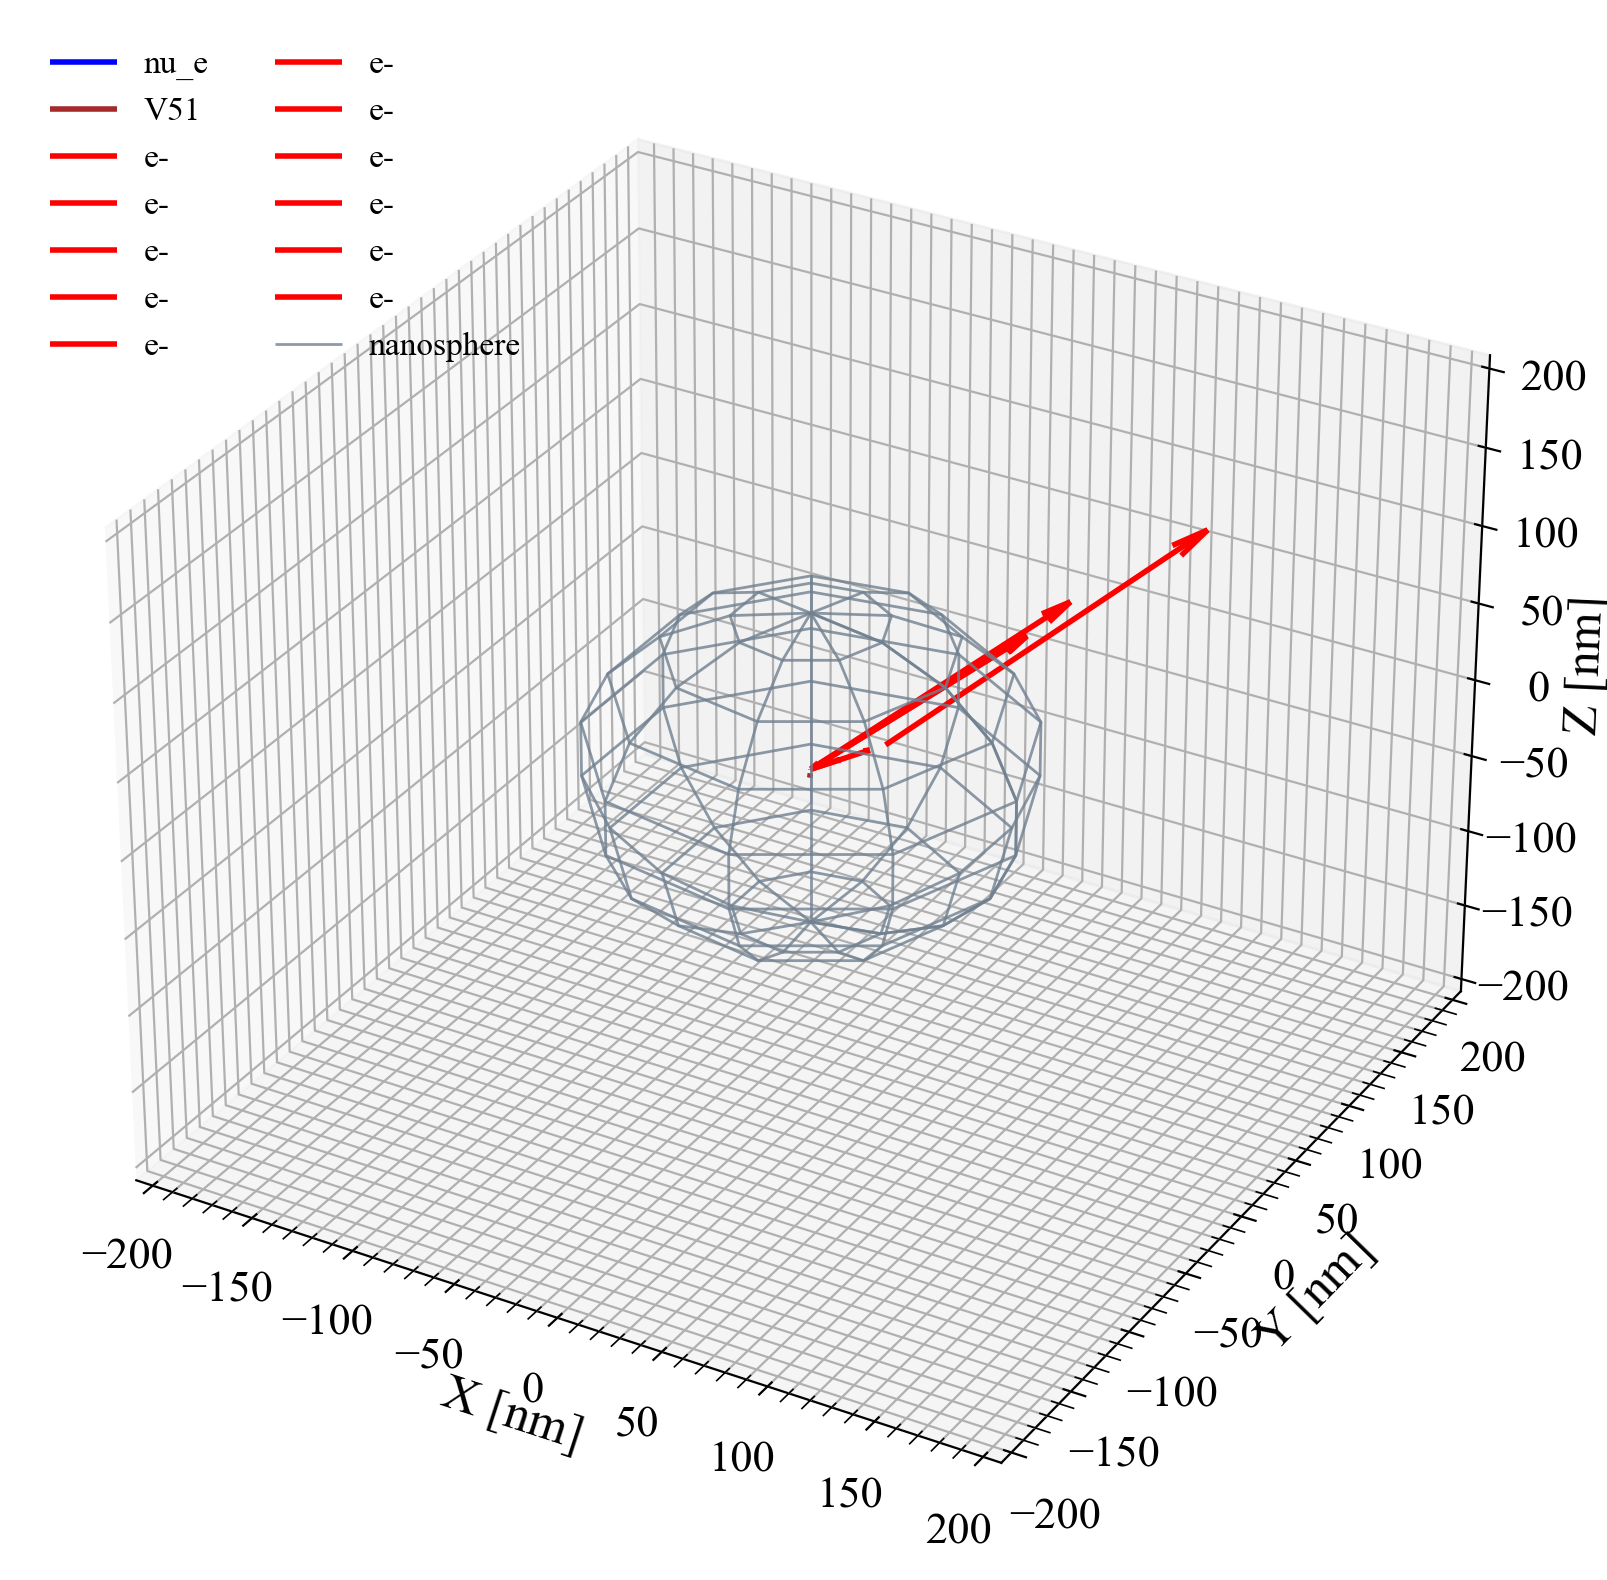

In [5]:
## ----------------------------------------- ##
##  PROCESS DICTIONARY OF EXITING PARTICLES  ##
## ----------------------------------------- ##

doPlot = True
eventToPlot = 7769
stepLength = 10.
color_list = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'gold', 'gray']
color_dict = {'V51':'brown', 'nu_e':'blue', 'gamma':'green', 'e-':'red'}

NuEnergykeV = np.zeros(nEvents)
TotalEnergyExiting = np.zeros(nEvents)
TotalChargeExiting = np.zeros(nEvents)
TotalParticleExiting = np.zeros(nEvents)
TotalMomentumExitingMag  = np.zeros(nEvents)
TotalMomentumExiting = np.zeros((nEvents, 3))
TotalMomentumExiting_electron =  np.zeros((nEvents, 3))
TotalMomentumExiting_nu = np.zeros((nEvents, 3))
TotalMomentumExiting_gamma = np.zeros((nEvents, 3))
TotalMomentumExiting_ion = np.zeros((nEvents, 3))

## Loop through all events
for idx, exitDict in enumerate(dictList['nansphereExitParticles']):

    ## print process
    if idx % 10000 == 0:
        print('On Event', idx, '/', nEvents)

    if doPlot and idx == eventToPlot:
        ax = plt.figure(figsize=(8,8), dpi=200).add_subplot(projection='3d')
        counter = 0

    totalCharge = 0.
    totalParticle = 0.
    totalEnergy = 0.
    totMom, totMomX, totMomY, totMomZ = 0., 0., 0., 0.

    ## loop through exiting particles in event
    for trackID, [pName, pCharge, pEnergy, [pPosX, pPosY, pPosZ], [pMomX, pMomY, pMomZ]] in exitDict.items():

        totalCharge += pCharge
        totalParticle += 1
        totalEnergy += pEnergy

        totMomX += pMomX
        totMomY += pMomY
        totMomZ += pMomZ

        totMomParticle = np.sqrt(pMomX**2 + pMomY**2 + pMomZ**2)
        dirX = pMomX/totMomParticle
        dirY = pMomY/totMomParticle
        dirZ = pMomZ/totMomParticle

        TotalMomentumExiting[idx][0] += pMomX
        TotalMomentumExiting[idx][1] += pMomY
        TotalMomentumExiting[idx][2] += pMomZ

        if pName == 'e-':
            TotalMomentumExiting_electron[idx][0] += pMomX
            TotalMomentumExiting_electron[idx][1] += pMomY
            TotalMomentumExiting_electron[idx][2] += pMomZ
        elif pName == 'nu_e':
            TotalMomentumExiting_nu[idx][0] += pMomX
            TotalMomentumExiting_nu[idx][1] += pMomY
            TotalMomentumExiting_nu[idx][2] += pMomZ
            NuEnergykeV[idx] = pEnergy
        elif pName == 'gamma':
            TotalMomentumExiting_gamma[idx][0] += pMomX
            TotalMomentumExiting_gamma[idx][1] += pMomY
            TotalMomentumExiting_gamma[idx][2] += pMomZ
        elif pName == 'V51':
            TotalMomentumExiting_ion[idx][0] += pMomX
            TotalMomentumExiting_ion[idx][1] += pMomY
            TotalMomentumExiting_ion[idx][2] += pMomZ
        else:
            print('no match for particle:', pName)

        ## plot each track in event
        if doPlot and idx == eventToPlot:
            pPosX_nm = pPosX*1e3
            pPosY_nm = pPosY*1e3
            pPosZ_nm = pPosZ*1e3
            print(pName, 'escapes with p = (',pPosX_nm, pPosY_nm, pPosZ_nm, ') w/ mag ', totMomParticle, 'keV')
            print(pPosX_nm, pPosY_nm, pPosZ_nm)
            print((pPosX_nm + dirX*stepLength), (pPosY_nm + dirY*stepLength), (pPosZ_nm + dirZ*stepLength))
            ax.quiver(pPosX_nm, pPosY_nm, pPosZ_nm, (pPosX_nm + dirX*stepLength), (pPosY_nm + dirY*stepLength), (pPosZ_nm + dirZ*stepLength), 
                      length = totMomParticle/1e5, arrow_length_ratio=0.1, lw=2, color=color_dict[pName], label= pName)
            counter += 1
            
        ## Done looping through tracks in events

    ## tabulate totals
    totMom = np.sqrt(totMomX**2 + totMomY**2 +  totMomZ**2)
    TotalMomentumExitingMag[idx] = totMom
    TotalChargeExiting[idx] = totalCharge
    TotalParticleExiting[idx] = totalParticle
    TotalEnergyExiting[idx] = totalEnergy

    ## Add in other Tracks
    if doPlot and idx == eventToPlot:
        
        ## plot stuff all internal in the nanosphere
        for id, [pname, [x1_um, y1_um, z1_um], [x2_um, y2_um, z2_um]] in dictList['nanosphereParticles'][idx].items():
                
            if id in list(exitDict.keys()) or pname =='Cr51' or pname.find('[') != -1:
                continue

            if (x2_um == 0.) and (y2_um == 0.) and (z2_um == 0.):
                ax.quiver(x2_um*1e3, y2_um*1e3, z2_um*1e3, x1_um*1e3, y1_um*1e3, z1_um*1e3,  
                          arrow_length_ratio=0.1, lw=2, color=color_dict[pname], label= pname)
            else:
                ax.quiver(x1_um*1e3, y1_um*1e3, z1_um*1e3, x2_um*1e3, y2_um*1e3, z2_um*1e3, 
                          arrow_length_ratio=0.1, lw=2, color=color_dict[pname], label= pname)

        ## format plots
        u, v = np.mgrid[0:2*np.pi:10j, 0:np.pi:10j]
        x = np.cos(u)*np.sin(v)*100
        y = np.sin(u)*np.sin(v)*100
        z = np.cos(v)*100
        ax.plot_wireframe(x, y, z, lw = 1, alpha=0.8, color="slategray", label='nanosphere')
        ax.set_xlabel('X [nm]')
        ax.set_ylabel('Y [nm]')
        ax.set_zlabel('Z [nm]')
        ax.set_xlim(-200,200)
        ax.set_ylim(-200,200)
        ax.set_zlim(-200,200)
        ax.legend(frameon=False, loc='upper left', fontsize=12, ncol=2)
        plt.tight_layout()
    ## Done looping through events

## Calculate magintude of neutrino, gamma, e-, and ion exit momentum
TotalMomentumExitingMag_electron = np.sqrt(TotalMomentumExiting_electron[:,0]**2 + 
                                           TotalMomentumExiting_electron[:,1]**2 + 
                                           TotalMomentumExiting_electron[:,2]**2 )

TotalMomentumExitingMag_nu = np.sqrt(TotalMomentumExiting_nu[:,0]**2 + 
                                     TotalMomentumExiting_nu[:,1]**2 + 
                                     TotalMomentumExiting_nu[:,2]**2 )

TotalMomentumExitingMag_gamma = np.sqrt(TotalMomentumExiting_gamma[:,0]**2 + 
                                        TotalMomentumExiting_gamma[:,1]**2 + 
                                        TotalMomentumExiting_gamma[:,2]**2 )

TotalMomentumExitingMag_ion = np.sqrt(TotalMomentumExiting_ion[:,0]**2 + 
                                       TotalMomentumExiting_ion[:,1]**2 + 
                                       TotalMomentumExiting_ion[:,2]**2 )

1st excited state decays (array([    7,    22,    23, ..., 99989, 99995, 99996]),)
1st excited state decays w/ lost of e- (array([ 2077,  8049,  9721, 12909, 17642, 27707, 30428, 32389, 38116,
       40769, 41636, 65816, 65987, 74251, 74862, 90237, 91478, 94705]),)
9761
90239
99938


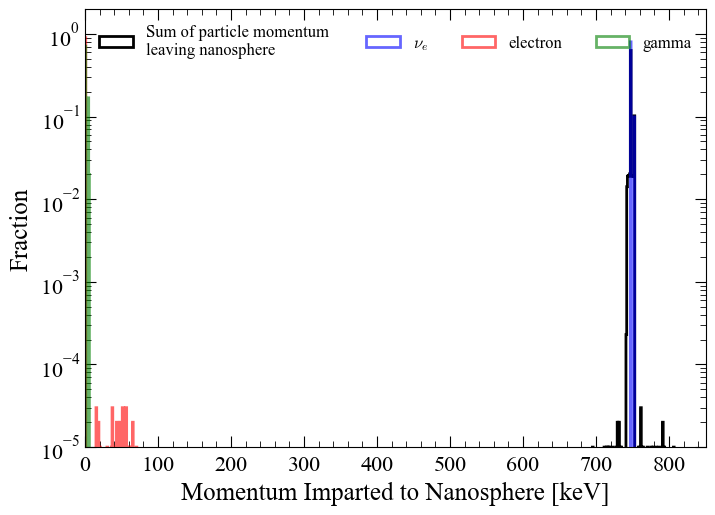

In [18]:
## Mask (>700 is g.s. decay)
## Mask (<700 is 1st excited state)
print('1st excited state decays', np.where(NuEnergykeV<700))

print('1st excited state decays w/ lost of e-', np.where((NuEnergykeV<700) & (TotalMomentumExitingMag_electron/1000 > 600)))

print(len(TotalMomentumExitingMag[NuEnergykeV<700]))
print(len(TotalMomentumExitingMag[NuEnergykeV>700]))
print(len(TotalMomentumExitingMag[TotalChargeExiting==0]))

mask = (NuEnergykeV>700) #& (TotalChargeExiting==0)

weightLength = len(TotalMomentumExitingMag[mask])

fig, ax = plt.subplots(1,1, dpi=100)

ax.hist(TotalMomentumExitingMag[mask]/1000, bins=1000, range=[0,1000], histtype='step', 
        color='black', lw=2, weights = [1/float(nEvents) for i in range(weightLength)], label='Sum of particle momentum \nleaving nanosphere')


ax.hist(TotalMomentumExitingMag_nu[mask]/1000, bins=1000, range=[0,1000], histtype='step', 
        color='blue', lw=2, alpha=0.6, weights = [1/float(nEvents) for i in range(weightLength)], label=r'$\nu_{e}$')

ax.hist(TotalMomentumExitingMag_electron[mask]/1000, bins=1000, range=[0,1000], histtype='step', 
        color='red', lw=2, alpha=0.6, weights = [1/float(nEvents) for i in range(weightLength)], label='electron')

ax.hist(TotalMomentumExitingMag_gamma[mask]/1000, bins=1000, range=[0,1000], histtype='step', 
        color='green', lw=2, alpha=0.6, weights = [1/float(nEvents) for i in range(weightLength)], label='gamma')


ax.set_yscale('log')
ax.set_ylabel('Fraction')
ax.set_xlabel('Momentum Imparted to Nanosphere [keV]')
ax.set_xlim(0,850)
ax.set_ylim(1e-5,2)
ax.legend(frameon=False, loc='upper center', fontsize=12, ncol=4)

(array([], dtype=int64),)
(array([    0,     1,     3, ..., 90023, 90027, 90029]),)
(array([    2,     6,     8, ..., 90025, 90026, 90028]),)
(array([  439,  3376,  3503,  4966,  5098,  6018,  7142,  7513,  8863,
        8907,  9032,  9048,  9304, 11104, 13994, 14592, 15720, 16534,
       18925, 20091, 20556, 20642, 21968, 22462, 22702, 24553, 25600,
       25803, 28894, 28963, 28983, 29616, 29882, 31703, 32400, 33240,
       35266, 36676, 37761, 38025, 38813, 38886, 38964, 39590, 39724,
       40171, 40795, 41851, 42260, 42382, 44651, 45236, 45443, 46599,
       46858, 47536, 47829, 49834, 52056, 53138, 53575, 55552, 56470,
       57111, 57331, 57693, 57918, 58797, 60154, 60174, 61729, 64512,
       65662, 66863, 67966, 68739, 68746, 69027, 69288, 70252, 70836,
       72378, 73278, 73782, 73915, 76078, 77148, 78723, 80939, 82056,
       82331, 85472, 85889, 86798, 87858, 87971, 88816, 89346]),)
(array([], dtype=int64),)


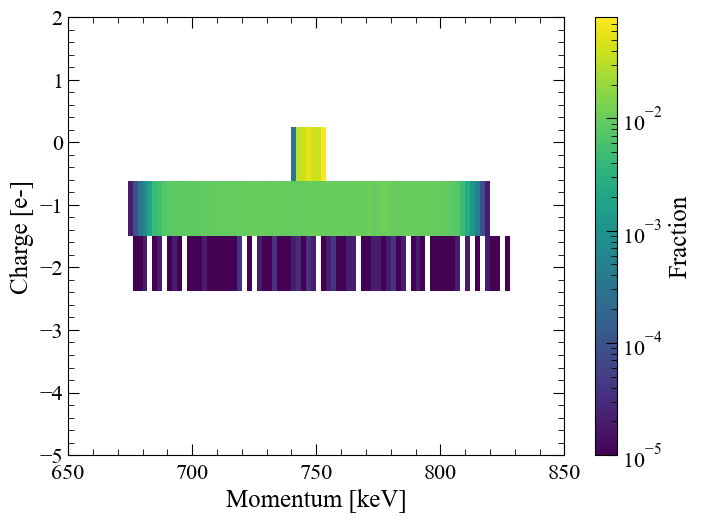

In [51]:
## Mask (>700 is g.s. decay)
## Mask (<700 is 1st excited state)
mask = (NuEnergykeV>700)
weightLength = len(TotalMomentumExitingMag[mask])

fig, ax = plt.subplots(1,1, dpi=100)

print(np.where(TotalChargeExiting[mask]==1.))
print(np.where(TotalChargeExiting[mask]==0))
print(np.where(TotalChargeExiting[mask]==-1))
print(np.where(TotalChargeExiting[mask]==-2))
print(np.where(TotalChargeExiting[mask]==-3))

#ax.scatter(TotalMomentumExitingMag[mask]/1000, TotalChargeExiting[mask], color='black')
h2 = ax.hist2d(TotalMomentumExitingMag[mask]/1000, TotalChargeExiting[mask], 
               bins=[450,8], range=[[0,900],[-5,2]],
               weights= [1/float(nEvents) for i in range(weightLength)],
               #cmin = 1e-5, cmax = 8e-2,
               cmap='viridis', norm = matplotlib.colors.LogNorm(vmin = 1e-5, vmax = 8e-2)
               )

ax.set_xlim(650.,850.)
ax.set_xlabel('Momentum [keV]')
ax.set_ylabel('Charge [e-]')
cb = fig.colorbar(h2[3],ax=ax)
cb.set_label('Fraction')

## Reconstruct Momentum

### $$ |p_{4}| - |p_{i}| \simeq Q (\sqrt{1 - (m_{4}/Q)^2} - 1) $$

In [5]:
## Q-value of Cr-51 decay
Q_EC_Cr51 = 752.62

m_V51 = 51 * 931.5e3 ## 51 nucleons and 931.5 MeV/nucleon

In [6]:
## Get momentum given mass and kinetic energy
def getMomentum(K, m):
    return (np.sqrt(K*K + 2*K*m))

## Get kinetic energy given mass and momentum
def getKineticEnergy(p, m):
    return (np.sqrt(p*p + m*m) - m)

In [9]:
## ----------------------------------------------------- ##
##  FUNCTION TO GET TOTAL, PER PARTICLE, AND PER VOLUME  ##
##                  ENERGY AND MOMENTUM                  ##
## ----------------------------------------------------- ##
def GetMomentumAndEnergy(dictList):

    totMomentumNanosphere = []
    totEdepCombined_20nm, totEdepCombined_100nm = np.zeros(nEvents), np.zeros(nEvents)

    TotModep = {'V51':[], 'gamma':[], 'e-':[], 'nu_e':[]}

    'exitEnergyParticles', 'exitMomentumParticles', 'exitParticleCharge'

    ## Loop through all events and record momentum imparted to nanosphere
    for idx in range(len(dictList['totMomentumNanosphere'])):

        totMomentum = 0.
        nanosphere_mom_x = dictList['totMomentumNanosphere'][idx][0]
        nanosphere_mom_y = dictList['totMomentumNanosphere'][idx][1]
        nanosphere_mom_z = dictList['totMomentumNanosphere'][idx][2]

        totMomentum = np.sqrt(nanosphere_mom_x**2 + nanosphere_mom_y**2 + nanosphere_mom_z**2)
        totMomentumNanosphere.append(totMomentum)

        for part in dictList['MOdepNanosphereParticles']:
            mom_x = dictList['MOdepNanosphereParticles'][part][idx][0]
            mom_y = dictList['MOdepNanosphereParticles'][part][idx][1]
            mom_z = dictList['MOdepNanosphereParticles'][part][idx][2]
            tot_mom = np.sqrt(mom_x**2 + mom_y**2 + mom_z**2)
            TotModep[part].append(tot_mom)

    ## check total energy dep past 100 nm deadlayer 
    for vol in dictList['totEdepCCDVol_20nm']:
            Edep_arr = dictList['totEdepCCDVol_20nm'][vol]
            totEdepCombined_20nm += Edep_arr

    ## check total energy dep past 100 nm deadlayer 
    for vol in dictList['totEdepCCDVol_100nm']:
        Edep_arr = dictList['totEdepCCDVol_100nm'][vol]
        totEdepCombined_100nm += Edep_arr


    ## energy exiting nanosphere

    return TotModep, totMomentumNanosphere, totEdepCombined_20nm, totEdepCombined_100nm

In [28]:
## Get values from function
TotModep, totMomentumNanosphere, totEdepCombined_20nm, totEdepCombined_100nm = GetMomentumAndEnergy(dictList)

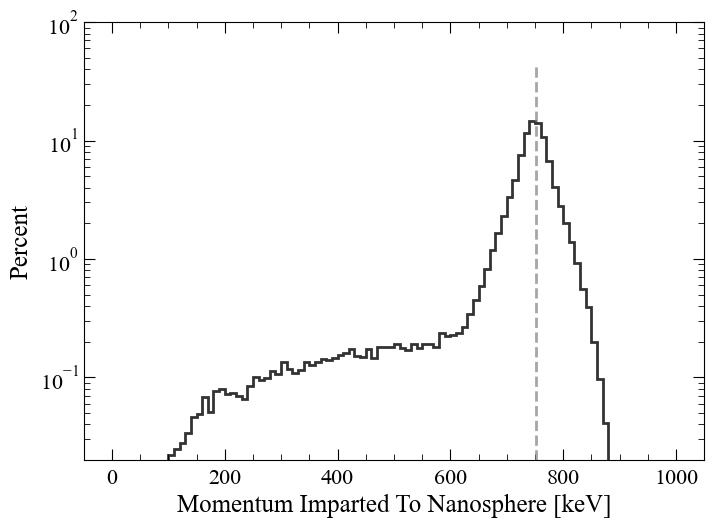

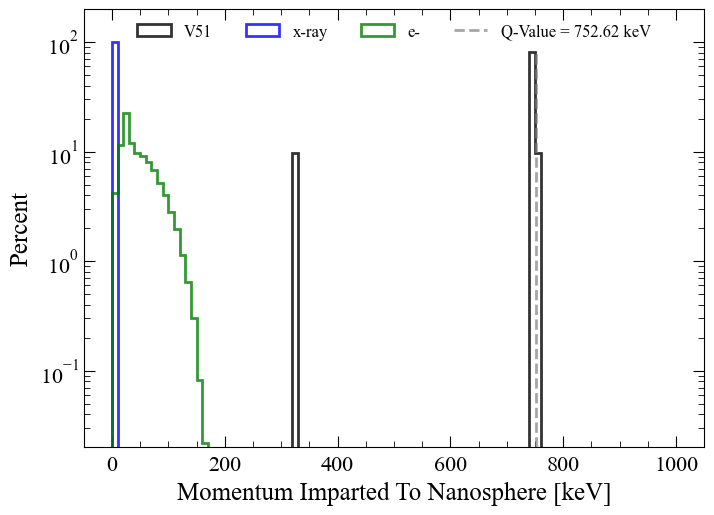

In [51]:

## Plot momentum imparted to nanosphere
fig, ax = plt.subplots(1,1, dpi=100)

ax.hist(totMomentumNanosphere,  bins=100, range=[0,1000], histtype='step', align='mid', alpha = 0.8, lw=2, ls = '-',
        color = 'black', weights=[100/float(nEvents) for i in range(nEvents)], label='Total')

ax.axvline(x=Q_EC_Cr51, ymin=0, ymax=0.9, label=f'Q-Value = {Q_EC_Cr51} keV', color='gray', alpha=0.7, ls='--')

ax.set_xlabel('Momentum Imparted To Nanosphere [keV]')
ax.set_ylabel('Percent')
ax.set_yscale('log')
ax.set_ylim(2e-2,100)

## Plot momentum imparted to nanosphere by particle
fig, ax = plt.subplots(1,1, dpi=100)

ax.hist(TotModep['V51'],  bins=100, range=[0,1000], histtype='step', align='mid', alpha = 0.8, lw=2,
        color = 'black', weights=[100/float(nEvents) for i in range(nEvents)], label='V51')

ax.hist(TotModep['gamma'],  bins=100, range=[0,1000], histtype='step', align='mid', alpha = 0.8, lw=2,
        color = 'blue', weights=[100/float(nEvents) for i in range(nEvents)], label='x-ray')

ax.hist(TotModep['e-'],  bins=100, range=[0,1000], histtype='step', align='mid', alpha = 0.8, lw=2,
        color = 'green', weights=[100/float(nEvents) for i in range(nEvents)], label='e-')

#ax.hist(TotModep['nu_e'],  bins=100, range=[0,1000], histtype='step', align='mid', alpha = 0.6, lw=2,
#        color = 'red', weights=[100/float(nEvents) for i in range(nEvents)], label=r'$\nu_{e}$')

ax.axvline(x=Q_EC_Cr51, ymin=0, ymax=0.9, label=f'Q-Value = {Q_EC_Cr51} keV', color='gray', alpha=0.7, ls='--')


ax.set_xlabel('Momentum Imparted To Nanosphere [keV]')
ax.set_ylabel('Percent')
ax.set_yscale('log')
ax.set_ylim(2e-2,200)
ax.legend(frameon=False, loc='upper center', fontsize=12, ncol=4)
